# Interpretability in Machine Learning

[Link to GitHub](https://github.com/michalis0/project_surrogate_models)

This notebook is the final report of a Data Mining and Machine Learning semester project done by Marija Krsteska,  under the supervision of Professor Michalis Vlachos from University of Lausanne, Faculty of Business and Economics.

## Introduction

The general area of this project is the topic of interpretability in Machine Learning. The idea is to evaluate how more understandable models fare against more complex ones. For this purpose, a Teacher - Student framework is developed and multiple algorithms are evaluated in the role of a student model. The framework is tested on several datasets.

## Teacher - Student Model

In Teacher-Student learning, a well-trained teacher model takes in a sequence of training samples $ {X}^T = \{x_1^T, ..., x_N^T \}, x_i^T \in R^{D_T}$ and predicts a sequence of class labels. Here, each class is represented by an integer $ c \in \{1, 2, ..., D_C \} $ where $ D_C $ is the total number of classes in the classification task. The goal is to learn a student model that can accurately predict the class labels for each of the its input samples $ {X}^S = \{x_1^S, ..., x_N^S \}, x_i^S \in R^{D_S} $ by using the knowledge transferred from the teacher model. To ensure effective knowledge transfer, the input sample sequences $ X^T $ and $ X^S $ need to be parallel to each other, i.e, each pair of train samples $ x_i^T $ and $ x_i^S $ share the same ground truth class label $ c_i \in \{1, 2, ..., D_C \} $. [1]

### Knowledge distillation

Knowledge Distillation is a particular type of knowledge transfer that has been developed in recent years. The main idea of knowledge distillation is including two models, which are named teacher and student. The teacher is a model with a strong capability, while the student can be a simple model. The teacher model is used to teach the student model by transferring significant knowledge to the student. The approach can be expressed as a form of training the student to mimic output activations of individual data examples represented by the teacher. [2] 

By using more interpretable models as students, this technique allows us to train simple models with comparable performance to the complex, less interpretable teacher models. In this way, we could gain valuable insights into the reasons why specific instanes are labeled with a specific class, something that is not possible with more complex models like neural networks for example, while retaining their performance.

#### Generating labels on unlabeled data

One way to transfer knowledge from the teacher to the student is to train the teacher with a labeled dataset using standard supervised learning. Afterwards, the teacher model is used to generate labels for data that was not used for training. This data can either be unlabeled data or labeled data that is relabeled by the teacher.

The new knowledge generated from the automatically labeled data can be used to improve the student model. To do this, a student model, which can be the same as the original model or different, is trained on the union set of the original supervised data and the unlabeled data with automatically generated labels. [3]

There are multiple ways for automatically generating labels for the unlabeled instances. For example, in the case of a classification problem the instance could be labeled with the average of the class probabilities. This labeling generates a **soft label**, probability vector, not a categorical label, that may not be straightforward to use when retraining the model. [3] 

On the other hand, generating **hard labels** typically requires a small amount of task-specific logic that addresses the structure of the problem. Once such labels are generated, they can be used to retrain the model, as if they were authentic ground-truth labels. [3] One shortcoming of the Teacher-Student learning is that a teacher model, not always perfect, occasionally makes the incorrect predictions that mislead the student model towards a suboptimal performance. In such a case, it may be beneficial to utilize hard labels of the training data. [1]

### Example of mimic learning

The following example provides a simple visual illustration of the idea that **complex learning models can be effectively simplified and represented using simpler models**. 

The first plot shows synthetically generated data points. The following five plots depicts how diverse learning models, MLPClassifier, GaussianNB, KNeighboursClassifier, RandomForestClassifier and LogisticRegression, approximate the distribution of the training data displayed on the first plot. 

The next five plots show the distribution learned after training on both the original training data and on the hard labels from the output of a neural network. We can observe that all the other (more interpretable) techniques can now mimic more closely the output of the more complex neural network. 

This is a low-dimensional example, but it serves to demonstrate the idea of constructing surrogate learning models that perform a type of mimic learning. [4]

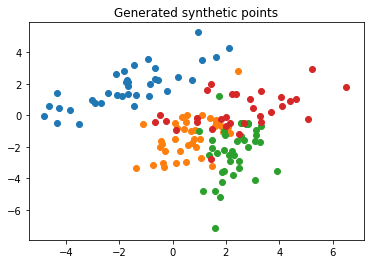

Classifiers trained on the original data


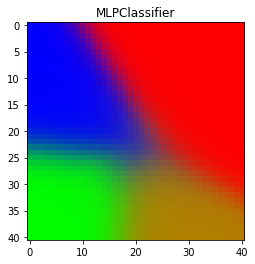

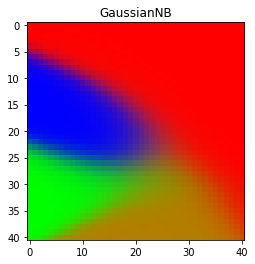

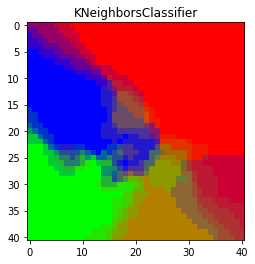

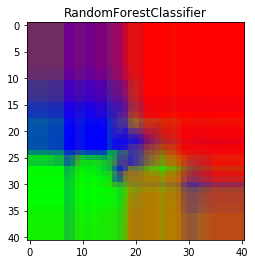

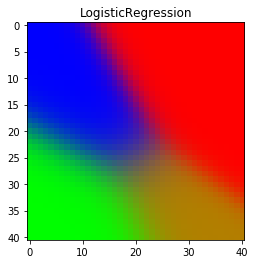

Classifiers trained on the original data and the hard labels from the Neural Network


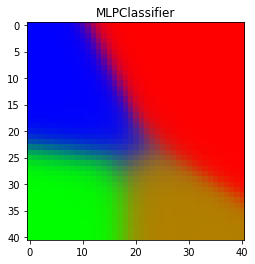

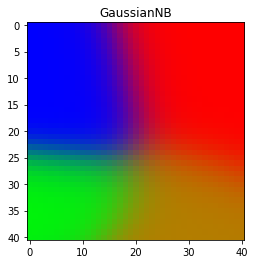

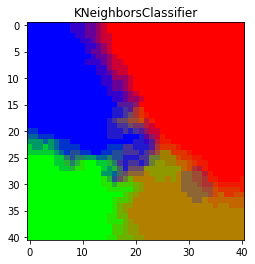

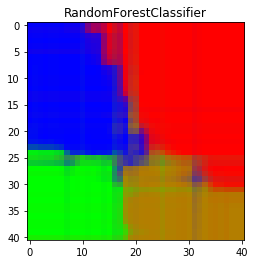

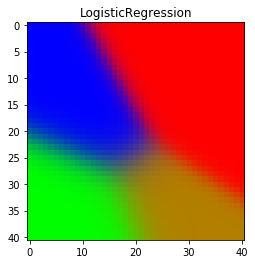

In [3]:
from synthetic_data import SyntheticData
synthetic_data = SyntheticData()

## Overview of the project

Student model, or surrogate model, is an interpretable machine learning model, that is trained to mimic the behaviour of a well-performing black-box teacher model. The main goal is to build more interpretable models, without decreasing performance.

In this repository, the student models are created with the following steps:

- Select a dataset and split it on training and testing set
- Train a teacher model on the training dataset, manually labeled data, as in supervised learning
- Obtain the predictions of the teacher model on the testing dataset
- Create a new training dataset, union dataset, by merging the original training dataset and the testing dataset with the hard labels provided by the teacher model
- Train the student model on the union dataset

Several different student models are trained and compared based on three criteria:

- How well they approximate the black-box model on the original test dataset
- How well they approximate the black-box model on the union dataset
- The relative improvement in approximation when compared to their non-surrogate version

Finally, the procedure is repeated on several different datasets to explore the impact of the data on the performance of the surrogate models.

## Models

The current reference teacher model is a Neural Network with one hidden layer.

The following models are used as surrogate student models:

- Gaussian Naive Bayes 
- K Nearest Neighbours
- Random Forest
- Logistic Regression

## Datasets

The models are trained on the following datasets

- [Titanic](https://www.kaggle.com/c/titanic/data)
- [Banknote Authentication](https://archive.ics.uci.edu/ml/datasets/banknote+authentication)
- [Breast Cancer](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)
- [Heart Disease](https://archive.ics.uci.edu/ml/datasets/heart+disease)
- [Mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom)
- [Rain Australia](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package)
- [Telco Customer Churn](https://www.kaggle.com/blastchar/telco-customer-churn)

The datasets are explained below, together with the results obtained for each dataset.

### Data requirements

The user may need to do data preprocessing in order to get the data in the required format. 

The data requirements are as follows: 
 - The data has to be in `csv` format 
 - The header column should be included
 - Only the valuable features for classification should be included 
 
Additionally, it is good if the dataset is balanced. 

However, the user does NOT have to: 
 - Encode target labels 
 - Standardize numerical features 
 - Convert categorical variables into dummy/indicator variables

In the folder `/code/preprocessing/` I have done preprocessing on the aforementioned datasets. For each dataset, there is a separate notebook, with comments on each step.


## Structure of the project

The project is structured as follows:
- code/ 
    - **Main Notebook.ipynb**
    - **synthetic_data.py**
    - **constants.json**
    - **data_loader.py** 
    - **trainer.py** 
    - preprocessing
        - Titanic.ipynb
        - Banknote_Authentication.ipynb
        - Breast_Cancer.ipynb
        - Heart_Disease.ipynb
        - Mushrooms.ipynb
        - Rain_Australia.ipynb
        - Telco_Customer_Churn.ipynb

- data/
    - clean_data 
    - raw_data

### Configuration file 

In order to run the notebooks, the user has to first fill in the configuration file `constants.json`. 

Variables to be set:

- **separate_train_test_file** <br>
This variable indicates whether the train and test data are in separate files. The user should set it to either `True` or `False`,
     
- **absolute_path** <br>
Absolute path to the data. This variable is considered only if `separate_train_test_file` is `False`.

- **absolute_path_train** <br>
Absolute path to the train data. This variable is considered only if `separate_train_test_file` is `True`.

- **absolute_path_test** <br>
Absolute path to the test data. This variable is considered only if `separate_train_test_file` is `True`.

- **class_column** <br>
Name of the target class. 

- **reference_model** <br>
The user should define the reference model, that performs the role of a teacher in the student model. The reference model should inherit from the base class for all estimators in scikit-learn, sklearn.base.BaseEstimator. 

- **models** <br>
The user should define the student models. The student models should also inherit from the base class for all estimators in scikit-learn, sklearn.base.BaseEstimator. 

### Data Loader

In [1]:
from data_loader import DataLoader

The `DataLoader class` is used to load the dataset. 

Some of the methods include:
- Encoding the target labels with values between 0 and num_classes-1 
- Standardizing the numerical features by removing the mean and scaling to unit variance
- Splitting the dataset into train and test set, if the varible separate_train_test_file in the json file is set to 'False'
- Returning a sample of the train dataset. All classes in the sample are represented with same proportion as in the original dataset. This sample is later used for plotting. 

### Train, plot and compare the models

In [2]:
from trainer import Trainer

The `Trainer class` is used to train, plot and compare the models. 

Some of the methods include:
- Setting the hyperparameters for the models. The user defines the models in the json configuration file and this method sets the values.   
- Predicting the target labels with each model. All supervised estimators in scikit-learn implement a fit(X, y) method to fit the model and a predict(X) method that, given unlabeled observations X, returns the predicted labels y.
- Plotting the predictions for a sample of the dataset. There is one square for each data instance in the sample, colored according to the probability that the instance is in a given target class. Each class is represented by different colour.
- Plotting heatmaps that show the percentage of matching predictions for each pair of models.

#### Comparison of the models

In order to compare the models and their performance on the different datasets, I plot three heatmaps. 

The **first heatmap** shows the percentage of matching predictions for each pair of models on the initial test set. 

The **second heatmap** shows the percentage of matching prediction for each pair of models when using the augmented dataset. The augmented dataset contains the train and test set. The outputs for the instances in the train set are the original outputs. The outputs for the instances in the test set are obtained with the reference model. 

The **third heatmap** shows the relative improvement in matching predictions for each pair of models when using the augmented dataset. For example, a value of 1 in the cell corresponding to two models indicates that there is 1 percent more matching predictions between the two models when using the augmented dataset instead of the initial dataset. 

## Datasets and Results

### Banknote Authentication

#### Dataset

Data were extracted from images that were taken from genuine and forged banknote-like specimens. An industrial camera was used to digitize the images. The final images have 400x400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

The classification problem is using the extraxted features from banknote images, to predict whehter the banknote is authentic or not. 

The data is in one file, Banknote_Authentication.csv. It contains data for 1372 banknotes. Each instance has the following 5 features: variance, skewness, curtosis, entropy and class (0 - not authentic, 1 - authentic). 

The dataset does not contain NaN values and the class distribution is 762 instances labled as class 0 and 610 instances labeled as class 1. 

#### Results

The first five plots show the predictions for a sample of X_train set. From the plots we can notice that RandomForestClassifier outperforms the other models and best predicts the probability of each instance to be in the target class. On the other side, from the first heatmap we can see that GaussianNB model has lowest percentage of matching prediction with the MLPClassifier. Additionally, there was no improvement when predicting on a sample of the augmented dataset, as seen in the third heatmap.  

The second five plots show the predictions for a sample of X_train + more labeled points given by the reference model. There is no noticable change. 

However, on the third heatmap we can see that LogisticRegression and KNeighborsClassifier have slighly higher percentage of matches with the MLPClassifier.   

In [3]:
data_loader = DataLoader()

Plotting the predictions for a sample of X_train set


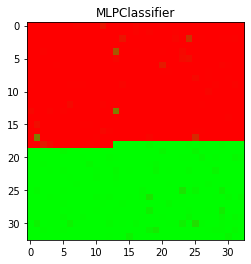

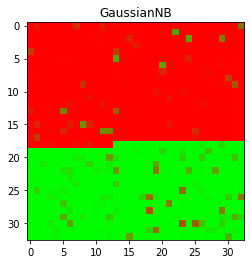

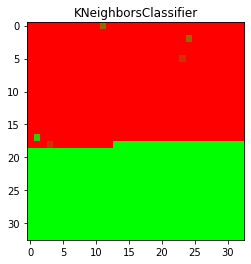

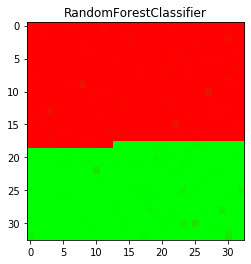

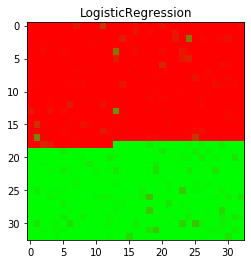

Plotting the predictions for a sample of X_train + more labeled points given by the reference model


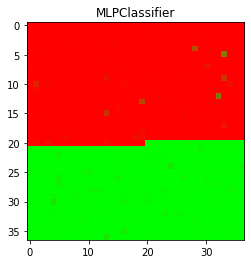

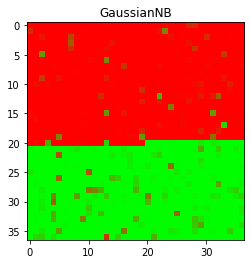

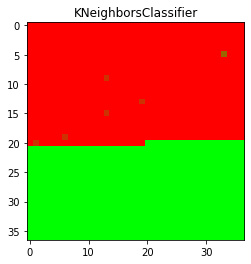

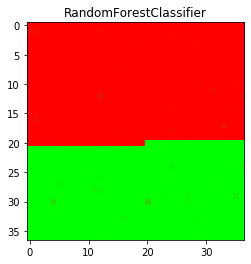

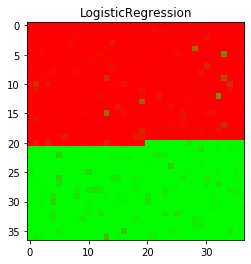

Plotting heatmaps


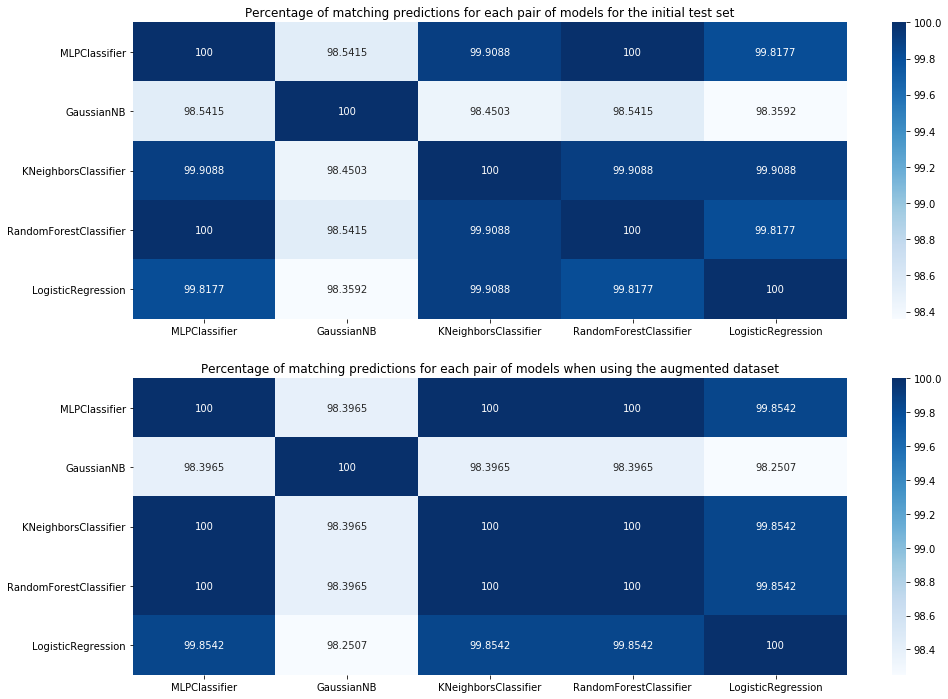

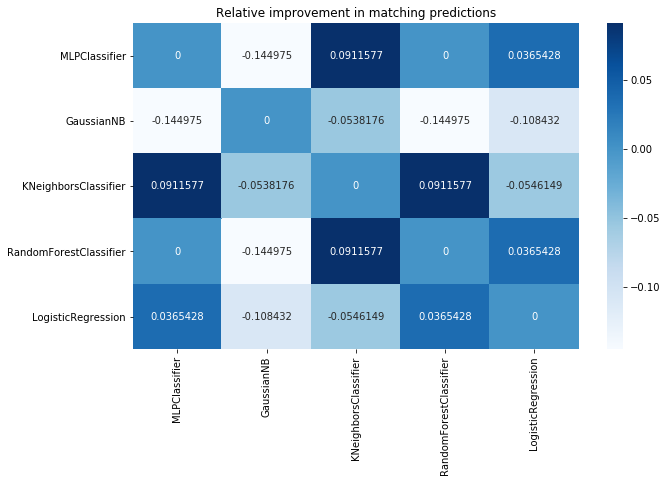

In [4]:
trainer = Trainer(data_loader)

### Breast Cancer

#### Dataset

The original title of the dataset is Wisconsin Diagnostic Breast Cancer Data Set. It contains 569 digitized images of a fine needle aspirate of a breast mass. The features computed from each image describe the characteristics of the cell nuclei present in the image. 

The classification problem is using the real-valued input features to predict whether the cancer is benign or malignant. 

Each instance has 32 attributes, ID number, Diagnosis (M = malignant, B = benign) and the following real-valued features computed for each cell nucleus: radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, fractal dimension. The mean, standard error, and "worst" or largest (mean of the three
largest values) of these features were computed for each image, resulting in 30 features.  For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

I decided to drop the `id` column. The dataset does not have missing attribute values. The class distribution is 357 benign and 212 malignant cancer. 

#### Results

Below are the results for the Breast Cancer dataset. 

The first five plots show the predictions for a sample of X_train set. From the plots we can see that MLPClassifier and RandomForestClassifier best predict the probability of each instance to be in the target class. Additionally, on the first heatmap we can see that these two models have 100% matching predictions. The GaussianNB model has the worst performance compared to MLPClassifier, with 94,0659% of matching predictions. 

The second five plots show the predictions for a sample of X_train + more labeled points given by the reference model. From the plots we can see that MLPClassifier, RandomForestClassifier and LogisticRegression best predict the probability of each instance to be in the target class. Additionally, we can see from the second heatmap that the matching predictions for MLPClassifier and RandomForestClassifier is 100% and for MLPClassifier and LogisticRegression is 99.1213%. Even though there is an improvement of 0.1344%, the GaussianNB model still has the worst performance compared to MLPClassifier, with 94,2004% of matching predictions. 

In [4]:
data_loader = DataLoader()

Plotting the predictions for a sample of X_train set


/home/mkrsteska/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


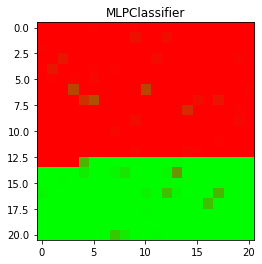

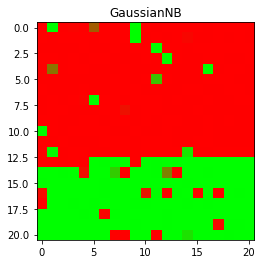

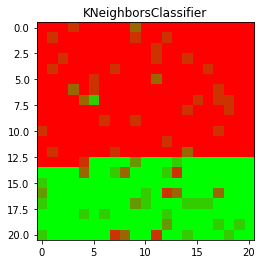

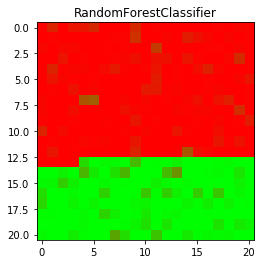

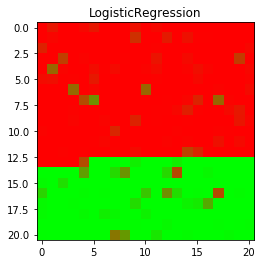

Plotting the predictions for a sample of X_train + more labeled points given by the reference model


/home/mkrsteska/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mkrsteska/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


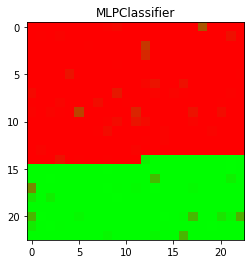

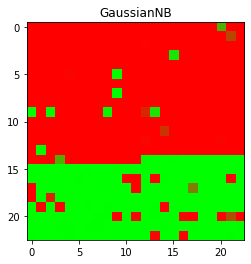

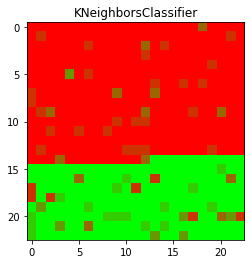

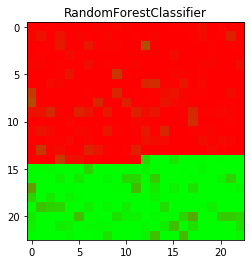

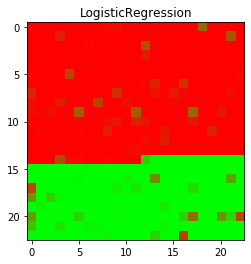

Plotting heatmaps


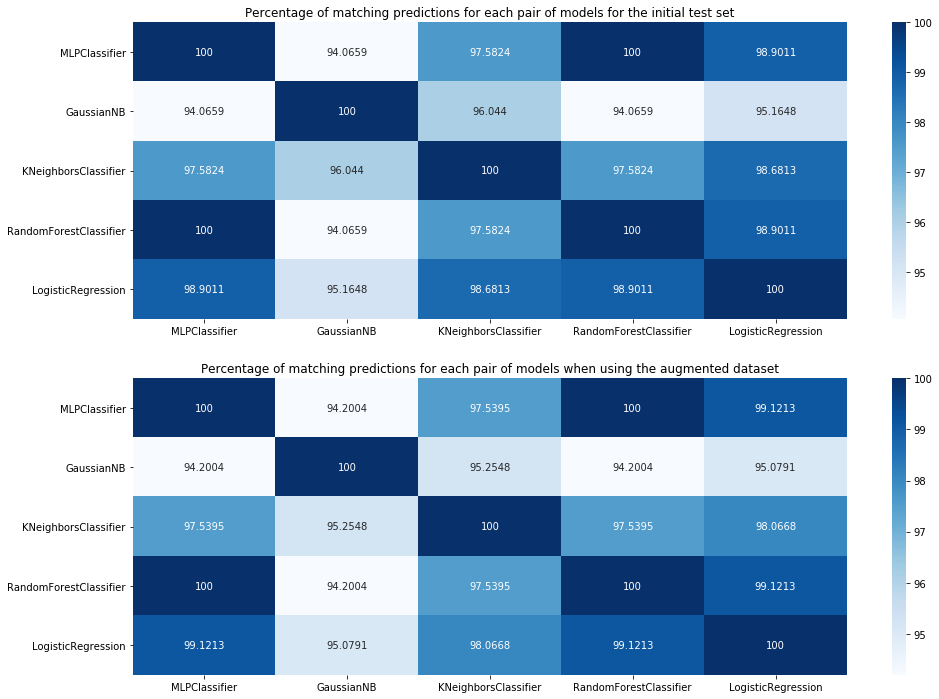

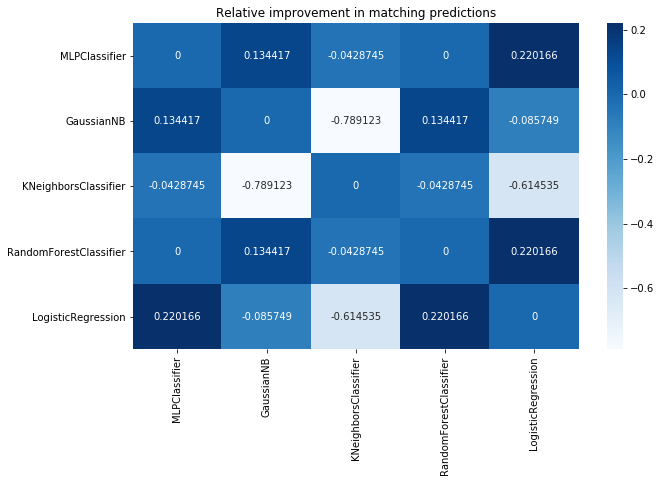

In [5]:
trainer = Trainer(data_loader)

### Heart Disease

#### Dataset

The Heart Disease Databases contains four separate databases collected form four different locations, all concerning heart disease diagnosis. The Cleveland database is the only one that has been used by ML researchers to
this date.

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. The target field refers to the presence of heart disease in the patient and is an integer valued from 0 (no presence) to 4. However, the data distribution was imbalanced and I decided to merge the classes that indicate presence of heart disease. Therefore, the classification problem is to distinguish the presence (value 1) from absence (value 0) of heart disease in the patient.
   
The features used to describe each patient are: age, sex, cp (chest pain type), trestbps (resting blood pressure), chol (serum cholestoral), fbs (fasting blood sugar), restecg (resting electrocardiographic results), thalach (maximum heart rate achieved), exang (exercise induced angina), oldpeak (ST depression induced by exercise relative to rest), slope (the slope of the peak exercise ST segment), ca (number of major vessels), thal, target. 

The dataset does not contain NaN values. The class distribution is 164 patients do not have heart disease, whereas 139 patients have indications of a heart disease. 

#### Results

Below are the results for the Heart Disease dataset. 

The first five plots show the predictions for a sample of X_train set. From the plots we can notice that RandomForestClassifier best predicts the probability of each instance to be in the target class, whereas GaussianNB is the worst.

The second five plots show the predictions for a sample of X_train + more labeled points given by the reference model. From the plots we can see that again RandomForestClassifier is the best one, and we can notice an improvement with the MLPClassifier. 

Aditionally, the third heatmap states that the number of matching predictions between the MLPClassifier and RandomForestClassifier has improved for 0.8346%. We can also see improvement with the KNeighboursClassifier model and the GaussianNB model. 

Regarding this dataset, RandomForestClassifier model has better results. Therefore, it can be used as a reference model. 

In [3]:
data_loader = DataLoader()

Plotting the predictions for a sample of X_train set


/home/mkrsteska/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


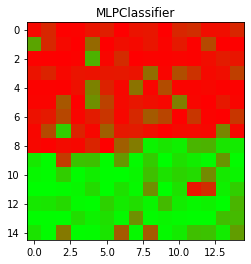

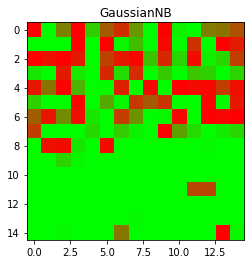

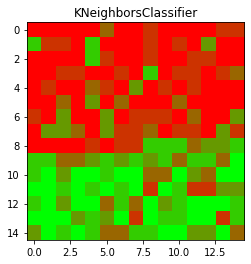

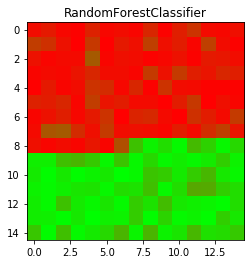

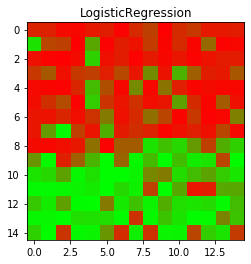

Plotting the predictions for a sample of X_train + more labeled points given by the reference model


/home/mkrsteska/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mkrsteska/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


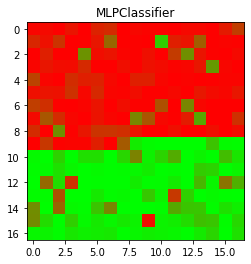

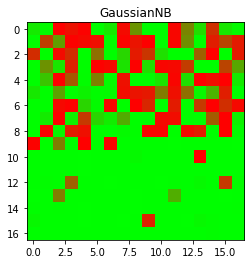

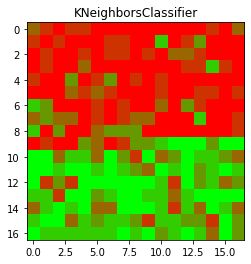

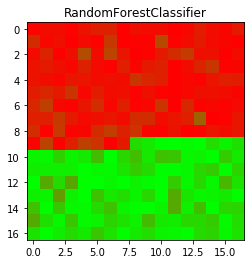

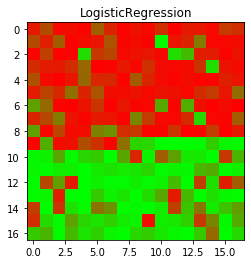

Plotting heatmaps


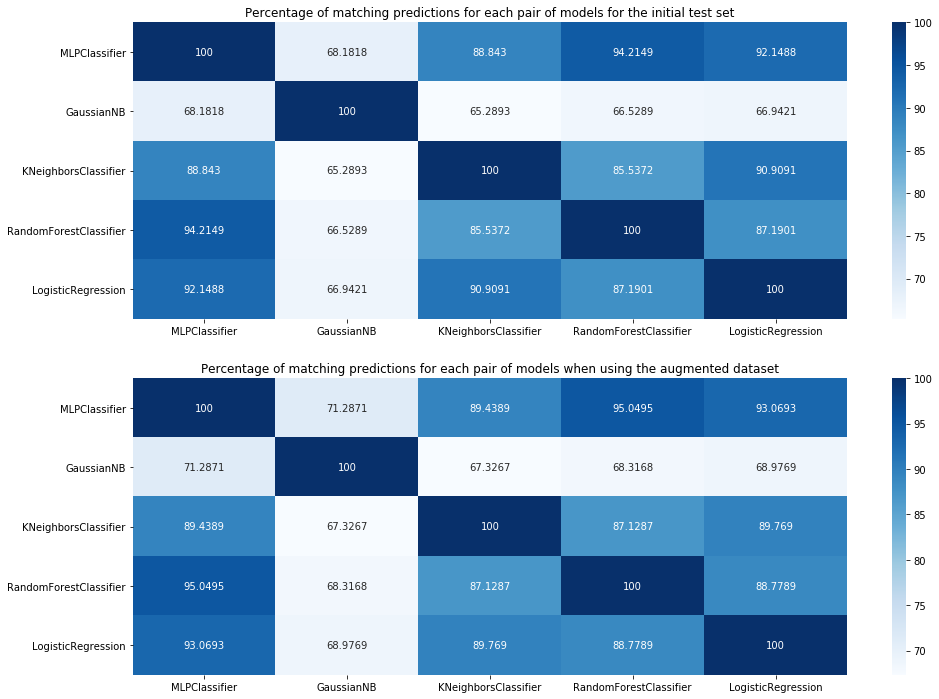

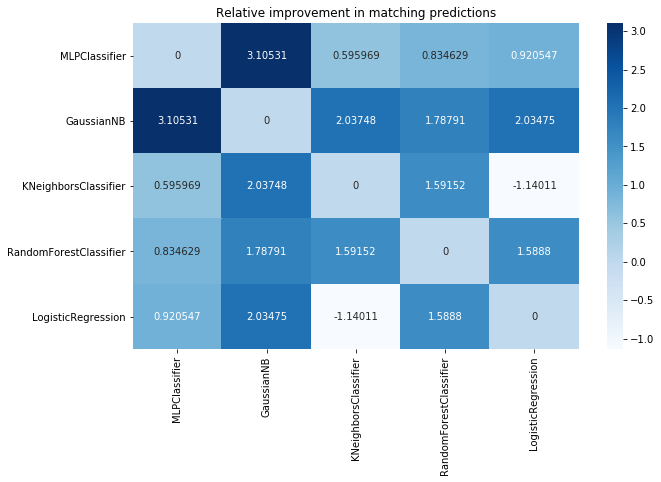

In [4]:
trainer = Trainer(data_loader)

### Mushrooms

#### Dataset

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family. Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one.

The classification problem is to predict whether the mushroom is safe to eat or deadly poisonous. 

The dataset has 8124 instances and each instance is described by the following attributes: class (e - edible, p - poisonous), cap-shape, cap-surface, cap-color, bruises, odor, gill-attachment, gill-spacing, gill-size, gill-color, stalk-shape, stalk-root, stalk-surface-above-ring, stalk-surface-below-ring, stalk-color-above-ring, stalk-color-below-ring, veil-type, veil-color, ring-number, ring-type, spore-print-color, population and habitat.

For the attribute `stalk-root` there are 2480 missing values denoted by '?', so I dropped this column. The class distribution is 4208 edible mushrooms and 3916 poisonous.

#### Results

Below are the results for the Mushroom dataset.

Overall, from the results shown in the third heatmap we can note a small improvement in matching predictions between the MLPClassifier and the GaussianNB, as well as between MLPClassifier and LogisticRegression. 

In [3]:
data_loader = DataLoader()

Plotting the predictions for a sample of X_train set


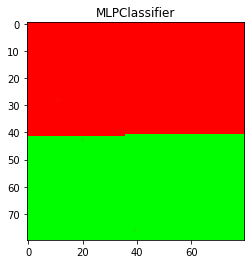

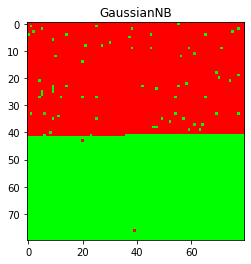

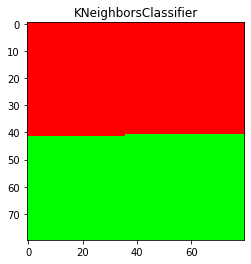

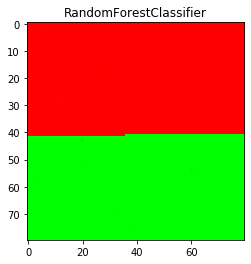

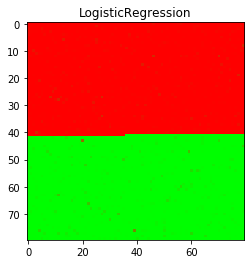

Plotting the predictions for a sample of X_train + more labeled points given by the reference model


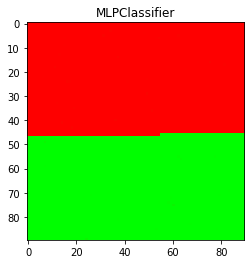

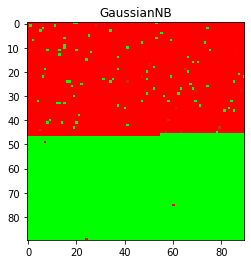

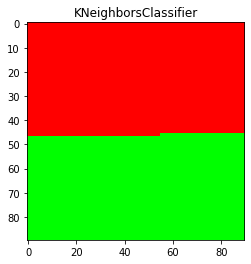

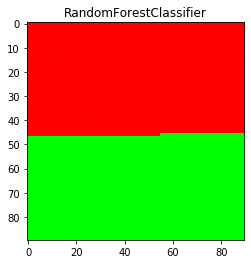

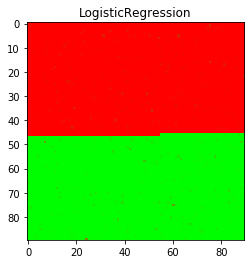

Plotting heatmaps


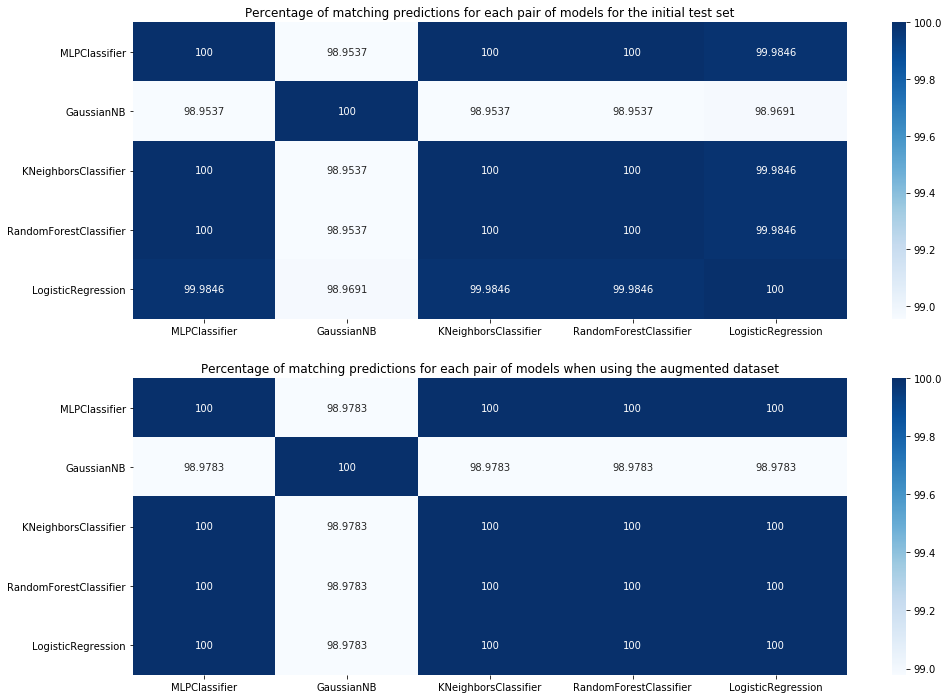

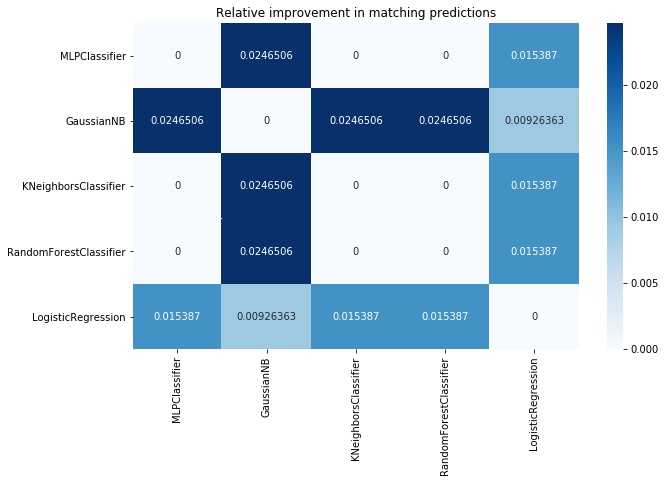

In [4]:
trainer = Trainer(data_loader)

### Rain Australia

#### Dataset

This dataset contains around 10 years of daily weather observations from numerous Australian weather stations.

The aim is to predict whether or not it will rain tomorrow by training a binary classification model on target variable. The target variable RainTomorrow means: Did it rain the next day? Yes or No.

There are 142193 instances and each instance has the following 23 attributes besides the target variable:  Date, 
Location, MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustSpeed, WindDir9am, WindDir3pm, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm, RainToday, RISK_MM. 

On Kaggle it is noted that the feature `RISK_MM` should be excluded when training a binary classification model, since it contains information directly about the target variable and it would give the false appearance of a high accuracy. Additionally, I dropped the attribute `Date`, since it has 3436 unique values and in my opinion it is irrelevent as it is. Moreover, I dropped the following attributes `Evaporation`, `Sunshine`, `Cloud9am`, `Cloud3pm`, because each had more than 50000 missing values. I filled the NaN values of the reamining numerical features with the mean or median value, and the NaN values for the reamaining categorical features with the most frequent value. 

The dataset is imbalanced with 110316 instances labeled 'No' and 31877 instances labeled 'Yes'. I took a sample of 32000 instances labeled with 'No' in order to have equal class distribution. 

#### Results

Below are the results for the Rain in Australia dataset.

The first five plots show the predictions for a sample of X_train set. From the plots we can notice that RandomForestClassifier best predicts the probability of each instance to be in the target class. Additionally, on the first heatmap we can see that MLPClassifier and RandomForestClassifier have a percentage of 89.3896 matching predictions. The GaussianNB model has the worst performance compared to MLPClassifier, with 66,7834% of matching predictions.

The second five plots show the predictions for a sample of X_train + more labeled points given by the reference model. From the plots we can again notice that RandomForestClassifier best predicts the probability of each instance to be in the target class. Additionally, we can see from the second heatmap that the matching predictions for MLPClassifier and RandomForestClassifier is 89.9682%, which is an improvement of 0.5785 

Overall, from the last heatmap we can note an improvement in the matching predictions between the reference model and each of the student models. 

In [3]:
data_loader = DataLoader()

Plotting the predictions for a sample of X_train set


/home/mkrsteska/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


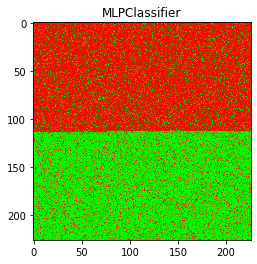

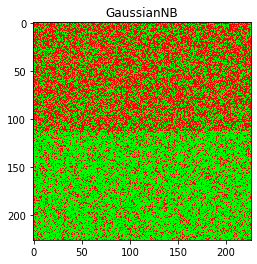

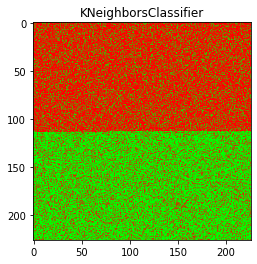

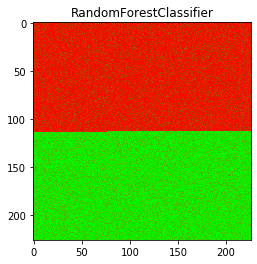

/home/mkrsteska/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


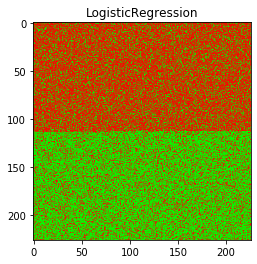

Plotting the predictions for a sample of X_train + more labeled points given by the reference model


/home/mkrsteska/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mkrsteska/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


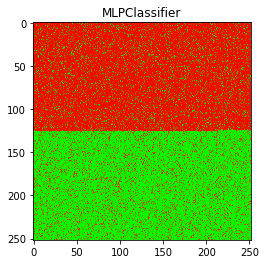

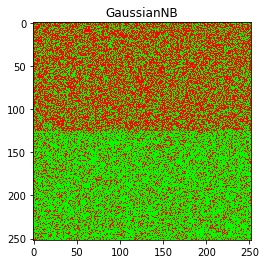

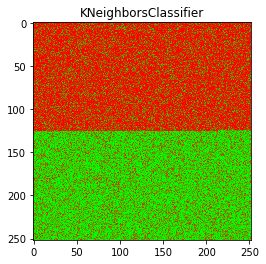

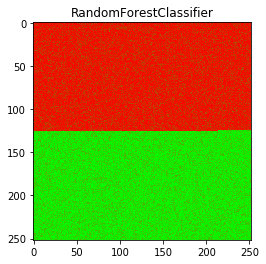

/home/mkrsteska/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


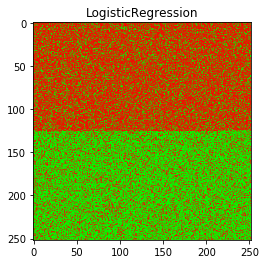

Plotting heatmaps


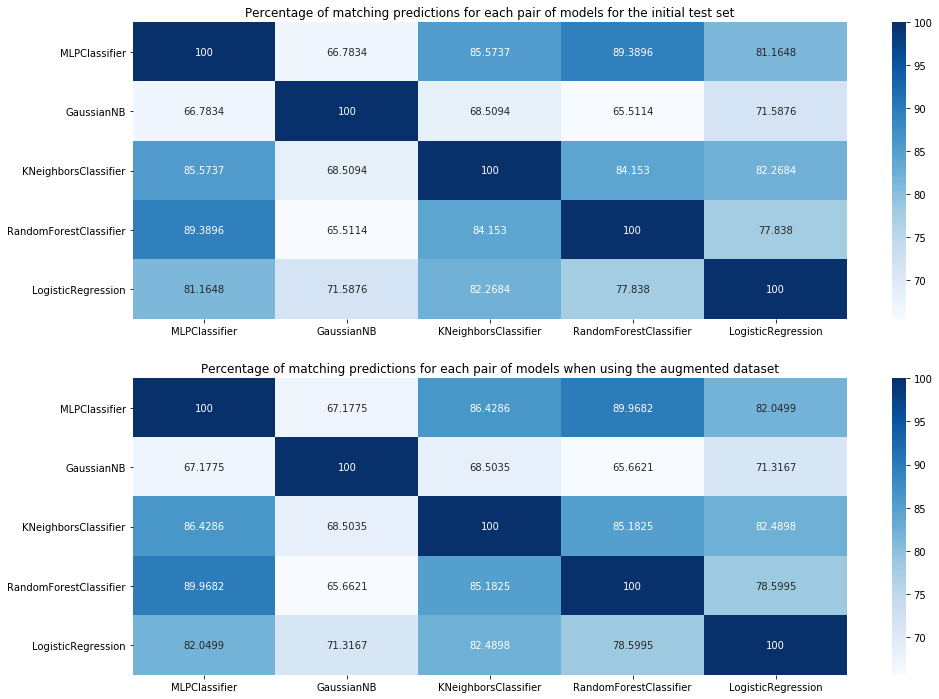

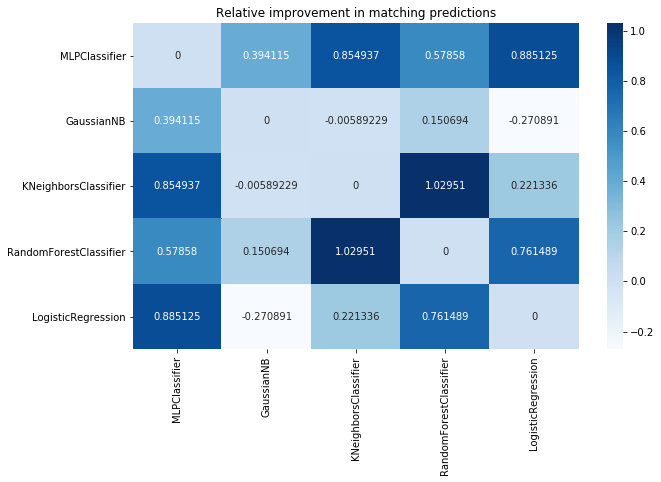

In [4]:
trainer = Trainer(data_loader)

### Telco Customer Churn

#### Dataset

The Telco Customer Churn dataset contains relevant customer data from the telecom industry. The classification problem is to predict the behaviour of the customers, whether they will stop using the service within a month or not. 

Each row represents a customer, each column contains the following customer’s attributes: customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn (Yes, No).
       
The atribute `TotalCharges` is type object, instead of float, and also for some of the data points there is no value. I removed them. 

The dataset is imbalanced with 5163 instances labeled 'No' and 1869 instances labeled 'Yes'. I took a sample of 2500 instances labeled with 'No' in order to have balanced class distribution.

#### Results

Below are the results for the Telco Customer Churn dataset.

The first five plots show the predictions for a sample of X_train set. From the plots we can notice that MLPClassifier and GaussianNB, which was unlikely for the previous datasets, best predict the probability of each instance to be in the target class. Additionally, on the first heatmap we can see that MLPClassifier, GaussianNB and RandomForestClassifier have a 100% percentage of matching predictions. The KNeighborsClassifier model and the LogisticRegression model perform worse compared to MLPClassifier. However, in the third heatmap we see an improvement greater than 1% for both cases. 

The second five plots show the predictions for a sample of X_train + more labeled points given by the reference model. From the plots and the second heatmap we can again see that MLPClassifier, GaussianNB and RandomForestClassifier have a 100% percentage of matching predictions. 

In [3]:
data_loader = DataLoader()

Plotting the predictions for a sample of X_train set


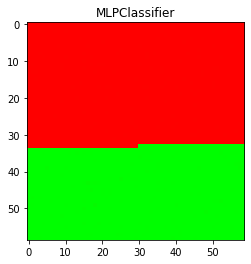

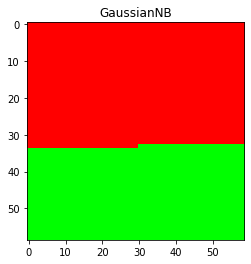

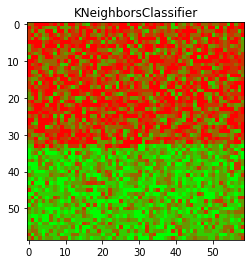

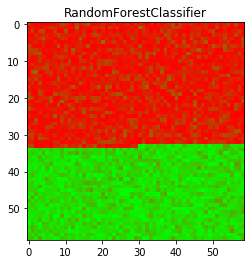

/home/mkrsteska/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


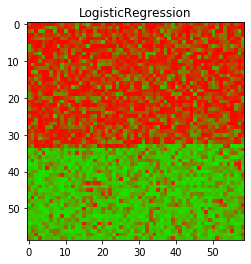

Plotting the predictions for a sample of X_train + more labeled points given by the reference model


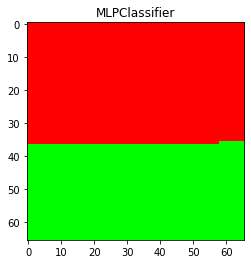

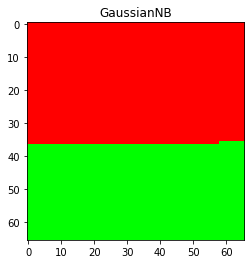

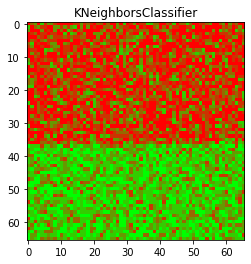

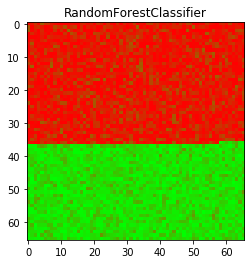

/home/mkrsteska/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


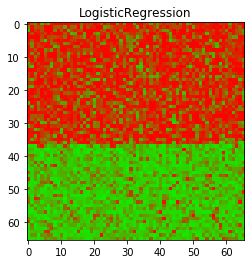

Plotting heatmaps


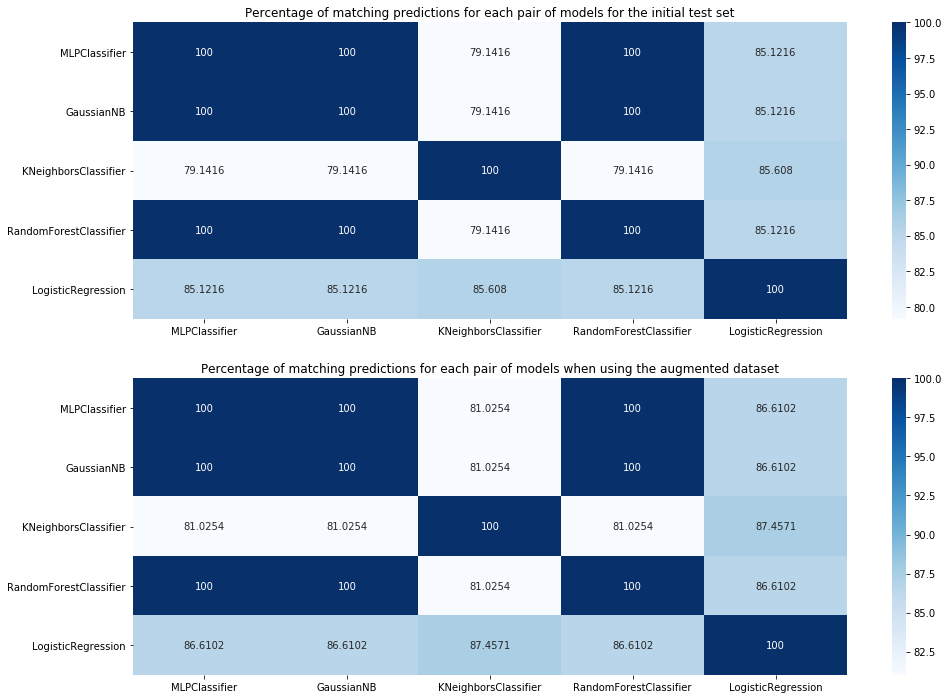

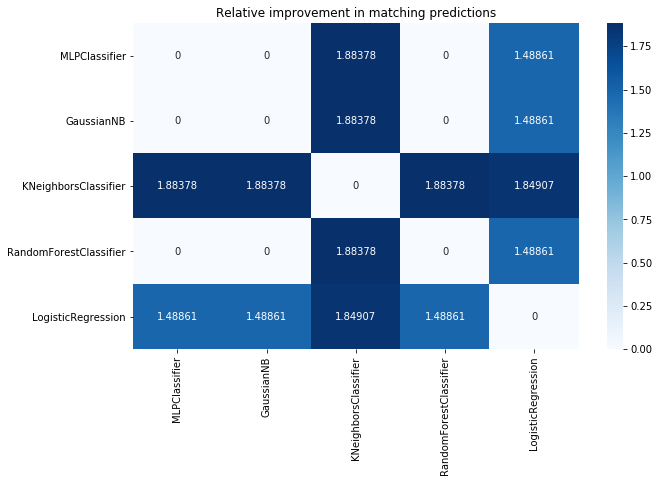

In [4]:
trainer = Trainer(data_loader)

### Titanic

#### Dataset

On April 15, 1912, the largest passenger liner ever made collided with an iceberg during her maiden voyage. When the Titanic sank it killed 1502 out of 2224 passengers and crew. One of the reasons that the shipwreck resulted in such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others.

The classification problem is using passenger data to predict what sorts of people were more likely to survive the Titanic shipwreck. 

The data is in two separate files, `train.csv` and `test.csv`. The `train.csv` file contains data for 891 of the real Titanic passengers. Each row represents one person. The columns describe different attributes about the person. The features are: PassengerId, Survived (target class), Pclass (Ticket class), Name, Sex, Age, SibSp, (Number of siblings / spouses aboard the Titanic), Parch (Number of parents / children aboard the Titanic), Ticket (Ticket number), Fare (Passenger fare), Cabin (Cabin number), Embarked (Port of Embarkation). The `test.csv` file contains the same features for each passenger, except the target label, Survived. 

I decided to drop the columns `Name`, `PassengerId` and `Ticket`, as irrelevent. Additionally, I droped the column `Cabin`, as it has 687 missing values in the train.csv file. The `Age` feature also has missing values and I decided to fill them in with the mean value.  

Overall, the train datased has 549 instances labeled as class 0 and 340 instances labeled as class 1, and the test dataset has 417 instances.

#### Results

Below are the results for the Titanic dataset.

The first five plots show the predictions for a sample of X_train set. From the plots we can notice that RandomForestClassifier best predicts the probability of each instance to be in the target class. However, in the first heatmap we can see that the MLPClassifier model has highest number of matching predictions with KNeighborsClassifier. 

The second five plots show the predictions for a sample of X_train + more labeled points given by the reference model. From the plots we can see that again RandomForestClassifier is the best one.

The third heatmap states that the number of matching predictions between the MLPClassifier and RandomForestClassifier has improved for 3.9081%, which is the most significant improvement we had. We can also see a significant improvement of 2.3298% in matched predictions with the KNeighboursClassifier.

Regarding this dataset, RandomForestClassifier model might be a better choise for a reference model.

In [3]:
data_loader = DataLoader()

Plotting the predictions for a sample of X_train set


/home/mkrsteska/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


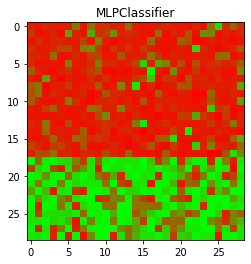

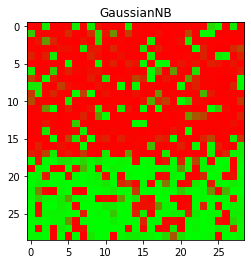

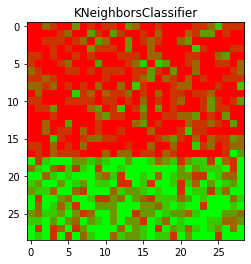

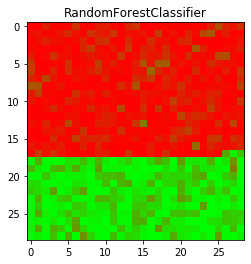

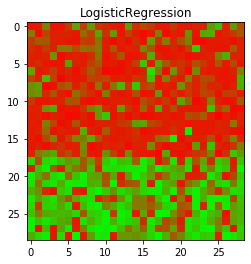

Plotting the predictions for a sample of X_train + more labeled points given by the reference model


/home/mkrsteska/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mkrsteska/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


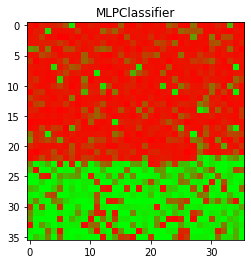

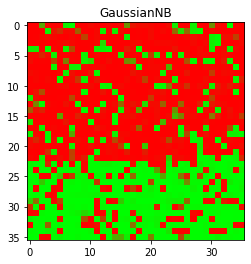

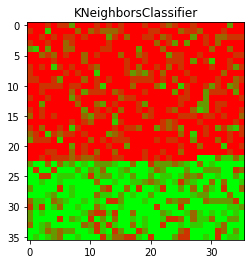

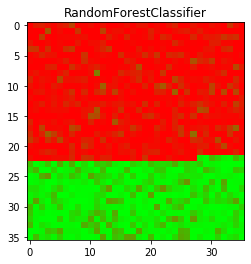

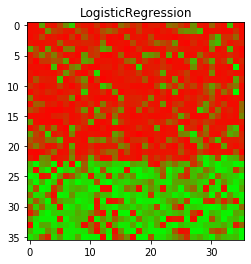

Plotting heatmaps


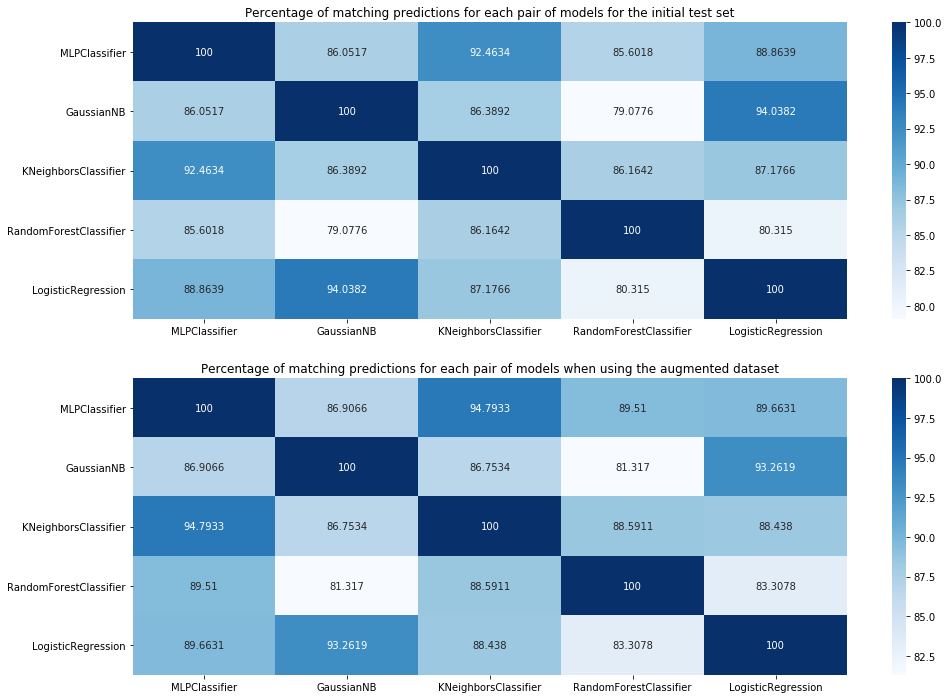

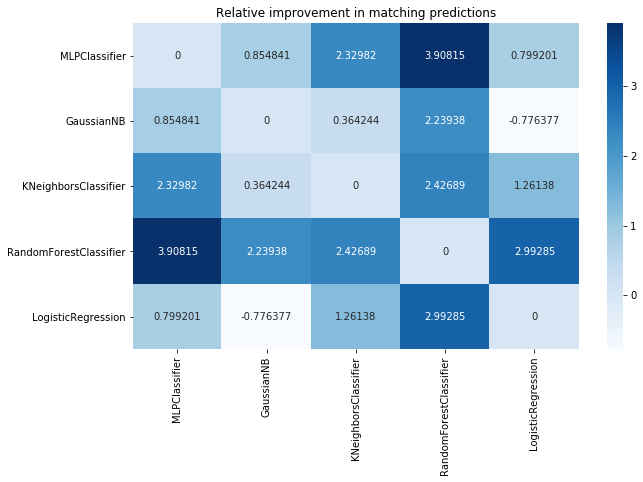

In [4]:
trainer = Trainer(data_loader)

## Future work

For future work, a more complex black-box teacher model can be implemented. This does not promise improvement in performance, as larger teachers, though they are more accurate by themselves, do not necessarily make for better teachers.[5] Moreover, more teacher-student combinations can be tested, as well as more datasets. As an additional improvement, a conditional Teacher-Student model can be implemented. According to [1], the student model instead of blindly combining the soft and hard labels, can be critical about the knowledge infused by the teacher model and judge whether the class posteriors are accurate or not before learning from them.  

## Conclusion

In this project, I created a Teacher-Student model framework. The student model, as an interpretable machine learning model, is trained to approximate the behaviour of a well-performing teacher model, without decreasing performance.

From the results we can conclude the following: 

- **MLPClassifier is not always the best teacher model.**
    - For example, for the Rain in Australia dataset from the plots we can clearly see that RandomForestClassifier best predicts the probability of each instance to be in the target class. Therefore, regarding this dataset, RandomForestClassifier model might be a better choise for a reference model.

- **Even when MLPClassifier is the best model, it is not always the case that the same model is the best student.**
    - For example, for the Titanic dataset we can note an improvement in the matching predictions between the MLPClassifier reference model and each of the student models. The best student model is KNeighboursClassifier with a significant improvement of 2.3298% in matched predictions with the MLPClassifier.
    - However, for the Breast Cancer dataset we can note that KNeighboursClassifier is not the best student model. The matching predictions for the MLPClassifier model and the KNeighboursClassifier is worsened by 0.0428% when trained on the augmented dataset. 
    
- **For a certain teacher student combination, we don't always note an improvement in the student model when trained on the augmented dataset.** 
    - For example, for the Breast Cancer dataset GaussianNB model has the worst performance compared to MLPClassifier, but we notice an improvement in its performance when predicting on the augmented dataset. 
    - For the Banknote Authentication dataset we can also see that GaussianNB student model has lowest percentage of matching prediction with the MLPClassifier. However, there is no improvement when predicting on the augmented dataset.  
    - On the other side, we can note that for the Telco Customer Churn dataset the GaussianNB student model performs as good as his teacher model, MLPCLassifier.
    
- **For different datasets, different teacher-student combinations perform better or worse. This indicates that this approach is not as general, meaning that not any student can learn from any teacher.** According to [5], there are even reports of failed experiments where teacher-student combinations do not improve performance
- **For any algorithm, the tuning of hyperparameters is dependent on the dataset. This applies for both the teacher and student models.** 

Finally, we can conclude that in order to gain valuable results for a particular dataset with this approach, one has to try out many different combinations of teacher and student models. Additionally, it is neccessary to tune the hyperameters according to the chosen dataset. 
  
The main contribution of this project is the framework that enables users to achieve this. Just by changing the config file, the user can try out different teacher-student-dataset combinations and analyze the results in order to find the best possible combination. On one hand, the framework speeds up the process of finding the best model setup for users. On the other hand, it enables users without programming knowledge to test this approach on their problems by using declarative configuration file. 

## References

[1] Meng, Zhong, et al. "Conditional teacher-student learning." ICASSP 2019-2019 IEEE International Conference on Acoustics, Speech and Signal Processing (ICASSP). IEEE, 2019. </br>
<br> [2] Abbasi, Sajjad, et al. "Modeling Teacher-Student Techniques in Deep Neural Networks for Knowledge Distillation." 2020 International Conference on Machine Vision and Image Processing (MVIP). IEEE, 2020. </br>
<br> [3] Radosavovic, Ilija, et al. "Data distillation: Towards omni-supervised learning." Proceedings of the IEEE conference on computer vision and pattern recognition. 2018. 
<br> [4] Interpretable Recommender Systems: Algorithms, Metrics and Visualization Techniques, Prof. Michalis Vlachos
<br> [5] Cho, Jang Hyun, and Bharath Hariharan. "On the efficacy of knowledge distillation." Proceedings of the IEEE International Conference on Computer Vision. 2019.